In [1]:
from hypyflow import blocks, PreprocessingPipeline
from scipy.io import loadmat
import numpy as np
patient_number = 190
cube_path = f"../data/ID_{patient_number}_CN_1_Headwall Linescan/LINEimagesID000{patient_number}C01_cropped_Pre-processed.mat"
cube = loadmat(cube_path)["CI_cube"]

                     _____                                                                    _____ 
                    ( ___ )------------------------------------------------------------------( ___ )
                     |   |                                                                    |   | 
                     |   |  ██░ ██▓██   ██▓ ██▓███ ▓██   ██▓  █████▒██▓     ▒█████   █     █░ |   | 
                     |   | ▓██░ ██▒▒██  ██▒▓██░  ██▒▒██  ██▒▓██   ▒▓██▒    ▒██▒  ██▒▓█░ █ ░█░ |   | 
                     |   | ▒██▀▀██░ ▒██ ██░▓██░ ██▓▒ ▒██ ██░▒████ ░▒██░    ▒██░  ██▒▒█░ █ ░█  |   | 
                     |   | ░▓█ ░██  ░ ▐██▓░▒██▄█▓▒ ▒ ░ ▐██▓░░▓█▒  ░▒██░    ▒██   ██░░█░ █ ░█  |   | 
                     |   | ░▓█▒░██▓ ░ ██▒▓░▒██▒ ░  ░ ░ ██▒▓░░▒█░   ░██████▒░ ████▓▒░░░██▒██▓  |   | 
                     |   |  ▒ ░░▒░▒  ██▒▒▒ ▒▓▒░ ░  ░  ██▒▒▒  ▒ ░   ░ ▒░▓  ░░ ▒░▒░▒░ ░ ▓░▒ ▒   |   | 
                     |   |  ▒ ░▒░ ░▓██ ░▒░ ░▒ ░     ▓██ ░▒░  ░     ░ ░ ▒  ░  ░ ▒ ▒░   ▒ ░ ░

# Fire up the visualization tool to visualize hyperspectral data

Clicked pixel: (657, 156), Spectral signature: [0.13496933 0.06145251 0.09045226 0.05529954 0.06882591 0.0620438
 0.03082192 0.04746835 0.09037901 0.08115183 0.07960199 0.10958904
 0.0862069  0.06464646 0.06857143 0.06618962 0.07325383 0.07865169
 0.05       0.08011445 0.07797538 0.10219922 0.11097257 0.11031175
 0.08098988 0.11471861 0.10880829 0.10573123 0.09701493 0.11418376
 0.11265165 0.14735099 0.12409347 0.17438272 0.12323682 0.13099499
 0.17744154 0.13533333 0.16460638 0.16258632 0.16819572 0.16491228
 0.18707483 0.18627451 0.20574413 0.20874036 0.17978088 0.17675781
 0.17156398 0.18587361 0.20812863 0.16028495 0.19295958 0.18678038
 0.21236333 0.19805195 0.1991256  0.21838635 0.23371212 0.22771536
 0.21692535 0.22062522 0.19268985 0.18451343 0.23270869 0.21103679
 0.20164204 0.22236629 0.21768273 0.2236801  0.18223867 0.21152115
 0.21804511 0.19477853 0.20881336 0.1849843  0.18901408 0.20194986
 0.18300111 0.19902121 0.19565217 0.17572134 0.18082678 0.17435378
 0.17107232 0.16

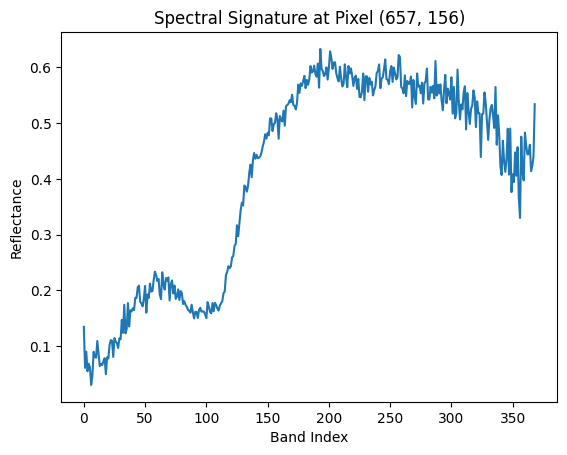

In [2]:
# First let's visualize the information !ç
from hypyflow import HyperspectralViewer, constants

wavelenghts=constants.HEADWALL_VNIR_WAVELENGHTS
# Create and run the viewer
viewer = HyperspectralViewer(cube, wavelenghts)
viewer.run()


# Test the distance metrics

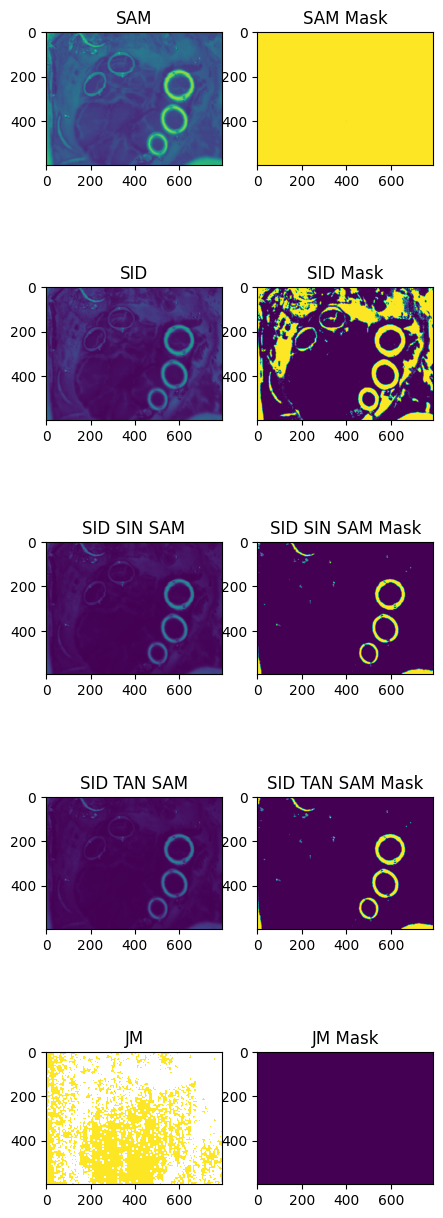

In [9]:
from hypyflow import distance_metrics
import matplotlib.pyplot as plt

example_signature = cube[400,400,:]

SAM_map, SAM_mask = distance_metrics.SAM(cube,example_signature, 0.1)
SID_map, SID_mask = distance_metrics.SID(cube,example_signature, 0.1)
SID_SIN_SAM_map, SID_SIN_SAM_mask=distance_metrics.SID_SIN_SAM(cube, example_signature,0.1)
SID_TAN_SAM_map, SID_TAN_SAM_mask=distance_metrics.SID_TAN_SAM(cube, example_signature,0.1)
JM_map, JM_mask=distance_metrics.JM_BC(cube, example_signature,0.1)

# Create a figure with 10 subplots, 5 for each column
fig, axs = plt.subplots(5, 2, figsize=(5,16))
axs= axs.flatten()
axs[0].imshow(SAM_map)
axs[0].set_title("SAM")
axs[1].imshow(SAM_mask)
axs[1].set_title("SAM Mask")
axs[2].imshow(SID_map)
axs[2].set_title("SID")
axs[3].imshow(SID_mask)
axs[3].set_title("SID Mask")
axs[4].imshow(SID_SIN_SAM_map)
axs[4].set_title("SID SIN SAM")
axs[5].imshow(SID_SIN_SAM_mask)
axs[5].set_title("SID SIN SAM Mask")
axs[6].imshow(SID_TAN_SAM_map)
axs[6].set_title("SID TAN SAM")
axs[7].imshow(SID_TAN_SAM_mask) 
axs[7].set_title("SID TAN SAM Mask")
axs[8].imshow(JM_map)
axs[8].set_title("JM")
axs[9].imshow(JM_mask)
axs[9].set_title("JM Mask")
plt.show()


# Test the different processing blocks available to process hyperspectral data

## Derivatives

--------------Original data--------------
 - Data shape: (597, 793, 369)
 - Data type: float64
 - Data range: -0.14659685863874344 - 3.61172373766686
 - Data mean: 0.26104514713164917 - Data std: 0.19599373925771474
--------------Running Pipeline--------------
 - [PROCESS] Running pipeline block: Derivative
--------------Final data--------------
 - Data shape: (597, 793, 369)
 - Data type: float64
 - Data range: -0.8619732792877132 - 0.99165484228336
 - Data mean: -7.12148072798491e-07 - Data std: 0.039555900461756256
 - Masked pixels 0 of 473421 (0.00%)
--------------Pipeline finished--------------


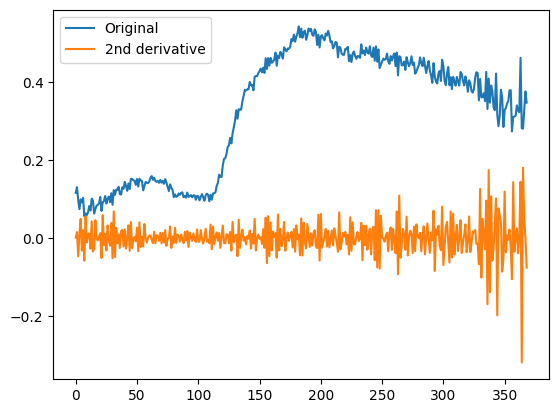

In [3]:
# process the 2th derivative
preprocesschain= [
    blocks.ProcessDerivative(order=2)
]
preprocessor = PreprocessingPipeline(cube)
filtered_data, full_mask, masks = preprocessor(preprocesschain)

import matplotlib.pyplot as plt
plt.plot(cube[cube.shape[0]//2,cube.shape[1]//2,:], label="Original")
plt.plot(filtered_data[cube.shape[0]//2,cube.shape[1]//2,:], label="2nd derivative")
plt.legend()
plt.show()


## Interpolation

--------------Original data--------------
 - Data shape: (597, 793, 369)
 - Data type: float64
 - Data range: -0.14659685863874344 - 3.61172373766686
 - Data mean: 0.26104514713164917 - Data std: 0.19599373925771474
--------------Running Pipeline--------------
 - [PROCESS] Running pipeline block: InterpolateBands
--------------Final data--------------
 - Data shape: (597, 793, 737)
 - Data type: float64
 - Data range: -0.14659685863874344 - 3.61172373766686
 - Data mean: 0.2611406275047291 - Data std: 0.1958415327926757
 - Masked pixels 0 of 473421 (0.00%)
--------------Pipeline finished--------------


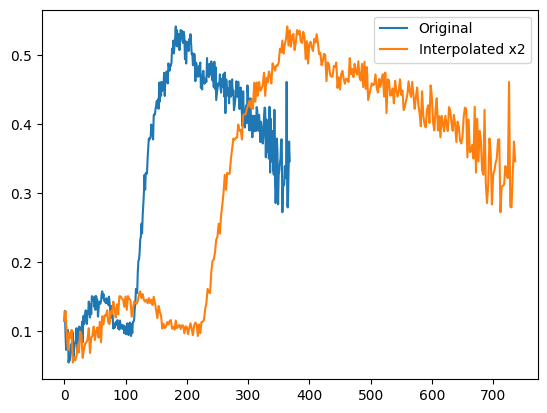

In [4]:
# Interpolate bands
preprocesschain= [
    blocks.ProcessInterpolateBands(ratio=2)
]
preprocessor = PreprocessingPipeline(cube)
filtered_data, full_mask, masks = preprocessor(preprocesschain)

import matplotlib.pyplot as plt
plt.plot(cube[cube.shape[0]//2,cube.shape[1]//2,:], label="Original")
plt.plot(filtered_data[cube.shape[0]//2,cube.shape[1]//2,:], label="Interpolated x2")
plt.legend()
plt.show()

## Smoothing

--------------Original data--------------
 - Data shape: (597, 793, 369)
 - Data type: float64
 - Data range: -0.14659685863874344 - 3.61172373766686
 - Data mean: 0.26104514713164917 - Data std: 0.19599373925771474
--------------Running Pipeline--------------
 - [PROCESS] Running pipeline block: SmoothSpatial
 - [PROCESS] Running pipeline block: SmoothSpectral
--------------Final data--------------
 - Data shape: (597, 793, 369)
 - Data type: float64
 - Data range: -0.02082550684299971 - 2.921897366722756
 - Data mean: 0.2610496887332019 - Data std: 0.19480575747478496
 - Masked pixels 0 of 473421 (0.00%)
--------------Pipeline finished--------------


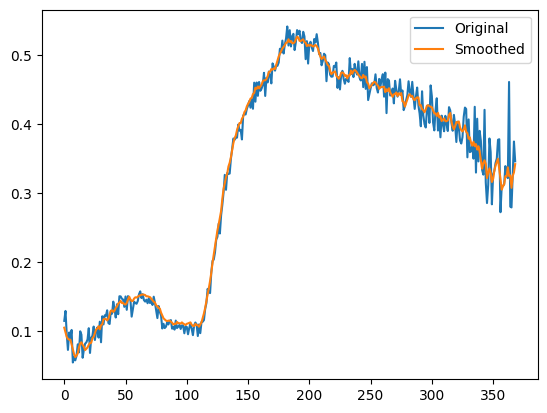

In [5]:
# Interpolate bands
preprocesschain= [
    blocks.ProcessSmoothSpatial(),
    blocks.ProcessSmoothSpectral()
]
preprocessor = PreprocessingPipeline(cube)
filtered_data, full_mask, masks = preprocessor(preprocesschain)

import matplotlib.pyplot as plt
plt.plot(cube[cube.shape[0]//2,cube.shape[1]//2,:], label="Original")
plt.plot(filtered_data[cube.shape[0]//2,cube.shape[1]//2,:], label="Smoothed")
plt.legend()
plt.show()

## Add noise

--------------Original data--------------
 - Data shape: (597, 793, 369)
 - Data type: float64
 - Data range: -0.14659685863874344 - 3.61172373766686
 - Data mean: 0.26104514713164917 - Data std: 0.19599373925771474
--------------Running Pipeline--------------
 - [PROCESS] Running pipeline block: AddNoise
--------------Final data--------------
 - Data shape: (597, 793, 369)
 - Data type: float64
 - Data range: -0.5342855331925824 - 3.7600144864799003
 - Data mean: 0.2610325442170267 - Data std: 0.2200315768955836
 - Masked pixels 0 of 473421 (0.00%)
--------------Pipeline finished--------------


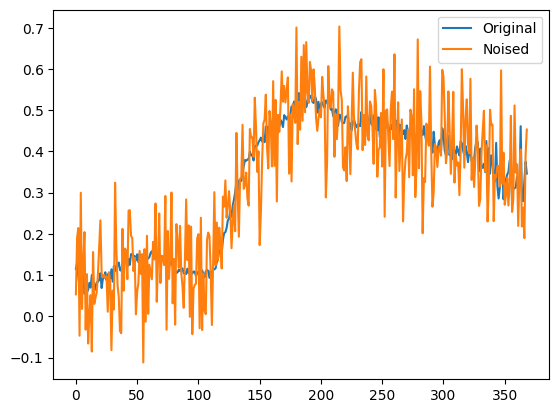

In [6]:
# Interpolate bands
preprocesschain= [
    blocks.ProcessAddNoise(0.1)
]
preprocessor = PreprocessingPipeline(cube)
filtered_data, full_mask, masks = preprocessor(preprocesschain)

import matplotlib.pyplot as plt
plt.plot(cube[cube.shape[0]//2,cube.shape[1]//2,:], label="Original")
plt.plot(filtered_data[cube.shape[0]//2,cube.shape[1]//2,:], label="Noised")
plt.legend()
plt.show()

## Complex operations

In [7]:
preprocesschain = [
    blocks.MaskNegativeValues(),
    blocks.MaskSaturatedValues(98),
    blocks.ProcessNormalize(type="minmax"),
    blocks.ProcessDenoise(),
    blocks.MaskRxAnomalyDetection(0.2),
    blocks.MaskTargetSignature(interactive=True,select_area=True,method="SAM"),  
    blocks.ProcessSmoothSpectral(),
    blocks.ProcessSmoothSpatial()
]
pre = PreprocessingPipeline(cube)
filtered_data, full_mask, masks = pre(preprocesschain, verbose=True, plot_masks=True)

np.save(f"../data/masks_{patient_number}.npy", full_mask)

--------------Original data--------------
 - Data shape: (597, 793, 369)
 - Data type: float64
 - Data range: -0.14659685863874344 - 3.61172373766686
 - Data mean: 0.26104514713164917 - Data std: 0.19599373925771474
--------------Running Pipeline--------------
 - [MASK] Running pipeline block: Negative
 - [MASK] Running pipeline block: Saturated
 - [MASK] Running pipeline block: RxAnomaly
 - [MASK] Running pipeline block: Target
 - [PROCESS] Running pipeline block: Normalize


ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
# second time, we can reuse the mask, speeding up the process and allowing to be reproducible
previous_mask = np.load(f"../data/masks_{patient_number}.npy")
filtered_data, full_mask, masks = pre(preprocesschain, verbose=True, plot_masks=True, mask = previous_mask)
# All the black areas are masked out! This saves a lot of time and reduces variation and error in following steps

--------------Original data--------------
 - Data shape: (597, 793, 369)
 - Data type: float64
 - Data range: -0.14659685863874344 - 3.61172373766686
 - Data mean: 0.26104514713165017 - Data std: 0.19599373925771513
--------------Running Pipeline--------------
 - Using previous mask, skipping masking blocks
 - Running pipeline block: Normalize
 - Running pipeline block: Denoise


--------------Original data--------------
 - Data shape: (597, 793, 369)
 - Data type: float64
 - Data range: -0.14659685863874344 - 3.61172373766686
 - Data mean: 0.26104514713165017 - Data std: 0.19599373925771513
--------------Running Pipeline--------------
 - Running pipeline block: RxAnomaly
 - Running pipeline block: Negative
 - Running pipeline block: Saturated
 - Running pipeline block: Target
Selected area from (655, 506) to (707, 566)
Shape of selected area: (60, 52, 369)
 - Running pipeline block: Normalize
   + Input Data shape: (597, 793, 369)
   + Output Data shape: (597, 793, 369)
--------------Final data--------------
 - Data shape: (597, 793, 369)
 - Data type: float64
 - Data range: 0.0 - 1.0
 - Data mean: 0.18358717644337005 - Data std: 0.19302412195643917
 - Masked pixels 145370 of 473421 (30.71%)
--------------Pipeline finished--------------


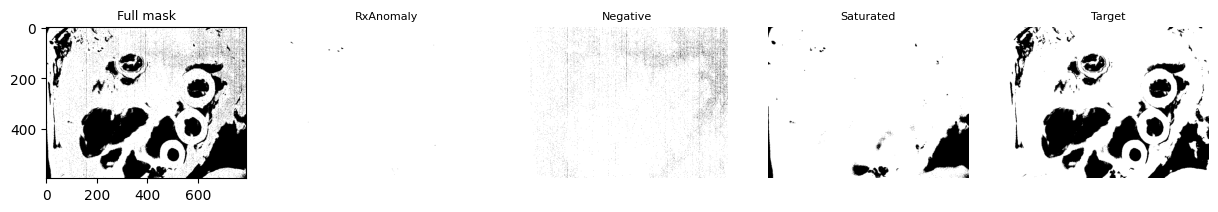

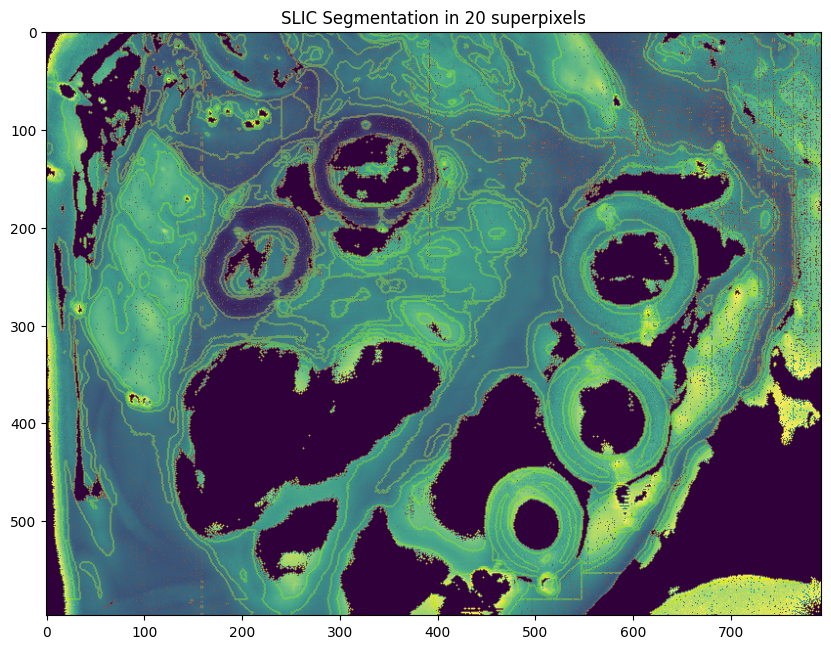

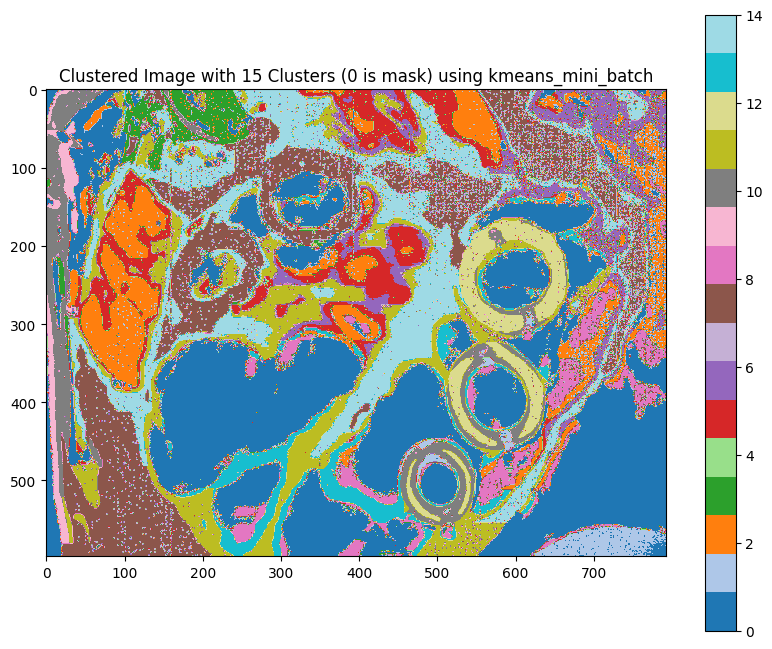

 Reconstruction shape: (597, 793, 369)


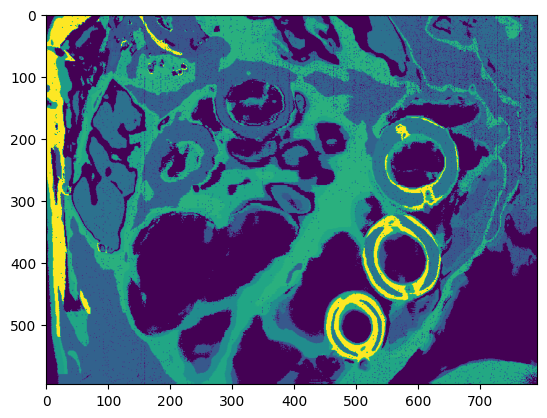

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from hypyflow import SpatialSpectralCluster

def SAM_metric(spectrum1, spectrum2):
    """
    Computes the Spectral Angle Mapper metric between two spectra.
    """
    # Normalize the spectra
    spectrum1 = spectrum1 / np.linalg.norm(spectrum1)
    spectrum2 = spectrum2 / np.linalg.norm(spectrum2)

    # Compute the dot product
    dot_product = np.dot(spectrum1, spectrum2)
    dot_product = np.clip(dot_product, -1.0, 1.0)

    # Compute the angle
    angle = np.arccos(dot_product)

    return angle



from scipy.io import loadmat
from hypyflow import blocks, PreprocessingPipeline

patient_number = 190
cube_path = "../data/ID_190_CN_2_Ximea Snapshot/SNAPimagesID000190C02_cropped_Pre-processed.mat"
cube_path = f"../data/ID_{patient_number}_CN_1_Headwall Linescan/LINEimagesID000{patient_number}C01_cropped_Pre-processed.mat"

cube = loadmat(cube_path)["CI_cube"]


preprocesschain = [
    blocks.MaskRxAnomalyDetection(0.2),
    blocks.MaskNegativeValues(),
    blocks.ProcessNormalize(type="minmax"),
    blocks.MaskSaturatedValues(98), 
    blocks.MaskTargetSignature(interactive=True,select_area=True,method="SAM"),
    #blocks.ProcessReduceDimensionality(method="PCA", explained_variance_threshold=98),
    #blocks.ProcessDenoise()

]
pre = PreprocessingPipeline(cube)
filtered_data, full_mask, masks = pre(preprocesschain, verbose=True, plot_masks=True)


cube = filtered_data

processer = SpatialSpectralCluster(20,0.1,15, k_method="kmeans_mini_batch")
reductor = SpatialSpectralCluster(slic_n_segments=100, slic_compactness=0.1, k_n_clusters=40, k_method="kmedoids", kmed_metric=SAM_metric)
final_data,slic_cluster_img,  kmed_cluster_img=processer.run(cube, mask=full_mask, plot=True)

reconstructed= processer.reconstruct(final_data)

print(f" Reconstruction shape: {reconstructed.shape}")

plt.imshow(reconstructed[:,:,0])
plt.show()
